# Decomposition

[Link to video](https://www.youtube.com/watch?v=4Vq8KqbHKh8&list=PLKmQjl_R9bYd32uHImJxQSFZU5LPuXfQe&index=5)

In [53]:
import sympy as sym
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
sym.init_printing()
from IPython.display import display, Math
from scipy.stats import boxcox
import matplotlib.pyplot as plt

Understanding your time series is fundamental when trying to gain insight and finding the best model to produce future forecasts. Most time series can be broken up into different components to help diagnose it in a structured way providing a powerful analysis tool.

## Time Series Components

Time series are a combination of (mainly) three components: Trend, Seasonality and Residuals/Remainder. Let's break each of these down.

Trend: This is the overall motion of the series. It may be consistently increasing overtime, decreasing overtime or a combination of both.

Seasonality: Any regular seasonal pattern in the series. For example, ice cream sales are regularly higher in summer than winter.

Residual/Remainder: This is the bit that is left over after we take into account the trend and seasonality. It can also be thought of as just statistical noise.

### Additive vs Multiplicative

For an additive model, we have

$$Y = T + S + R$$

And for a multiplicative series:

$$Y = T * S * R$$

Where Y is the series, T is the trend, S is the seasonality and R is the residual component.

The additive model is most appropriate when the size of the series’ variations are on a consistent numerical scale. On the other hand, the multiplicative model is when the series’ fluctuations are on a relative scale.

For example, if the ice cream sales are higher in summer by 1,000 every year, then the model is additive. If the sales are higher by a consistent 20% every summer, but the absolute number of sales are changing, then the model is multiplicative.

It is possible to convert a multiplicative model to an additive one by simply taking the log transfrom or the Box-Cox transform:

$$ln(y) = ln(T) + ln(S) + ln(R)$$

## How is Decomposition Done?

There are multiple algorithms and methods to decompose the time series into the three components. I want to go over the classical approach as this is frequently used and is quite intuitive.

Compute the trend component, T, using a moving/rolling average.

De-trend the series, Y-T for additive model and Y/T for multiplicative model.

Compute the seasonal component, S, by taking the average of the de-trended series for each season.

The residual component, R, is calculated as: R = Y-T-R for additive model and R = Y/(TR) for multiplicative model.

There are also several other methods available for decomposition such as STL, X11 and SEATS. These are advanced methods and add to the basic approach from the classical method and improve upon its shortcomings.

In [54]:
data = pd.read_csv('../data/airline.csv', index_col=0, parse_dates=True)
data.index = pd.to_datetime(data.index)

# Plot the data
fig = px.line(data, x=data.index, y='#Passengers',
              labels=({'#Passengers': 'Passengers', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18),
                  title_text='Airline Passengers', width=650, title_x=0.5, height=400)

fig.show()

From this plot we observe an increasing trend and a yearly seasonality. Notice that the size of the fluctuations are increasing through time, therefore we have a multiplicative model.

### Multiplicative

In [55]:

data.rename(columns={'#Passengers': 'multiplicative_decomposition'}, inplace=True)


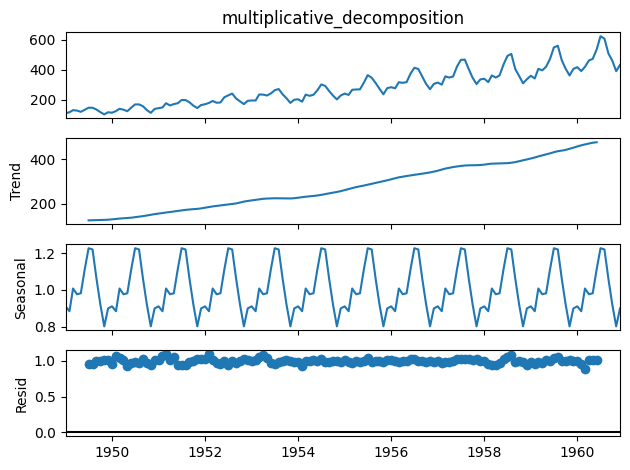

In [56]:
decomposition_plot_multi = seasonal_decompose(data['multiplicative_decomposition'],
                                              model='multiplicative',
                                              period=12)
decomposition_plot_multi.plot()
plt.show()

In [51]:
### Additive

We can convert our series to an additive model by stabilising the variance using the Box-Cox transform by applying the boxcox Scipy function:

In [58]:
# Apply boxcox to acquire additive model
data['additive_decomposition'], lam = boxcox(data['multiplicative_decomposition'])



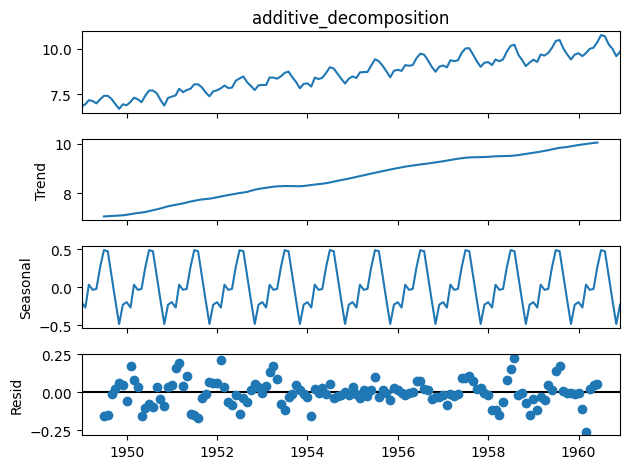

In [59]:
# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(data['additive_decomposition'],
                                            model='additive')
decomposition_plot_add.plot()
plt.show()